# K-Means Clustring

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset =pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\Iris-K-Means-Clustring dataset.csv')
dataset.head(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


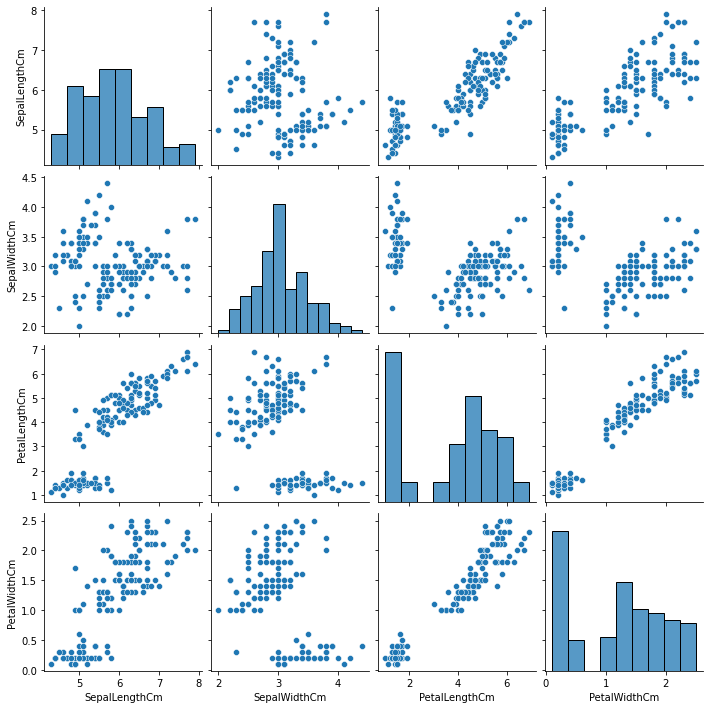

In [5]:
sns.pairplot(data=dataset)
plt.show()

In [6]:
from sklearn.cluster import KMeans
wcss =[]

for i in range(2,21):
    km =KMeans(n_clusters=i, init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

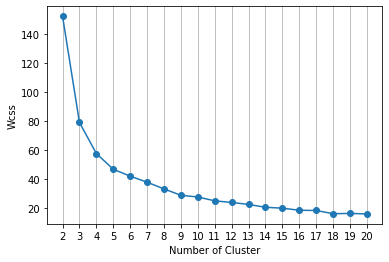

In [7]:
plt.plot([i for i in range(2,21)],wcss,marker ='o')
plt.xticks([i for i in range(2,21)])
plt.xlabel("Number of Cluster")
plt.ylabel('Wcss')
plt.grid(axis='x')
plt.show()

In [8]:
km =KMeans(n_clusters=3 ,init='k-means++')
dataset['Predict Value']=km.fit_predict(dataset)

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
dataset.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predict Value
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


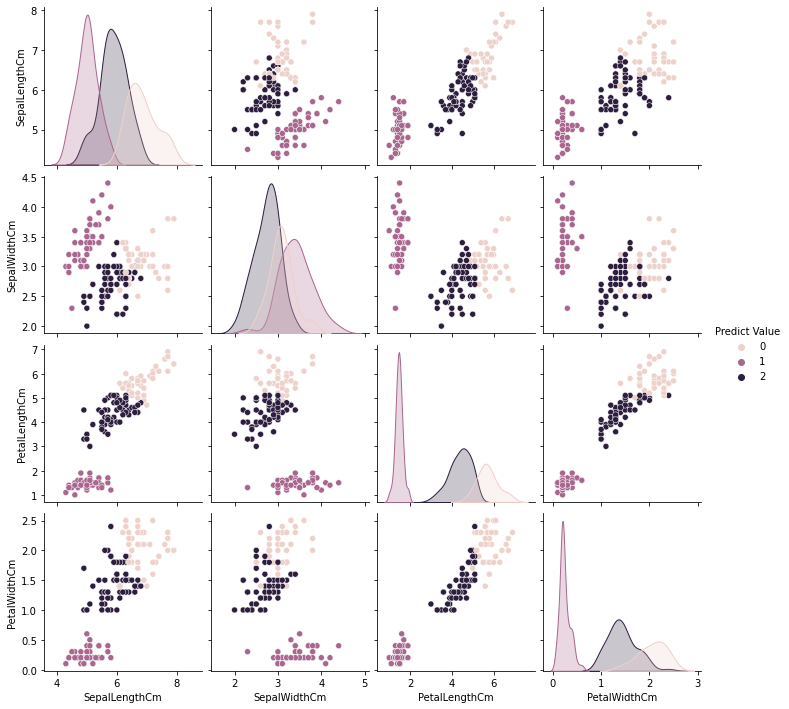

In [10]:
sns.pairplot(data=dataset,hue='Predict Value')
plt.show()

### Check Original with label dataset

In [11]:
dataset_org =pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\Iris.csv')
dataset_org.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [12]:
dataset_org.drop(labels=['Id'],axis=1 ,inplace=True)

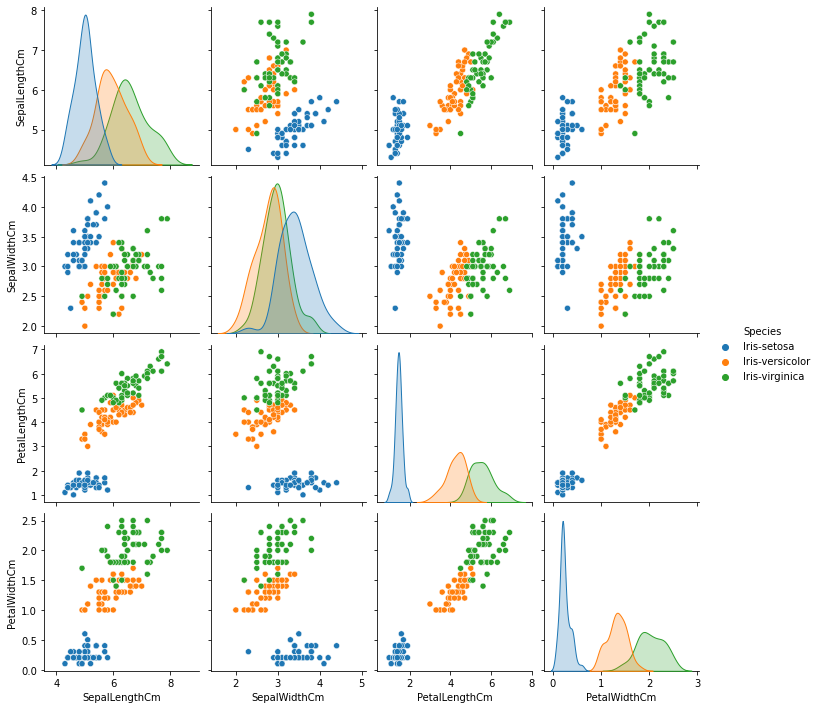

In [13]:
sns.pairplot(data=dataset_org,hue='Species')
plt.show()

## Silhouette Score
 Silhouette Score tells us how well each data point fits within its assigned cluster and how distinct the clusters are from each other.
 The score ranges from -1 (poor clustering) to 1 (well-clustered), with values near 0 indicating overlapping clusters.

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
ss =[]
no_clus =[j for j in range(2,21)]
for i in range(2,21):
    km1 =KMeans(n_clusters=i)
    km1.fit(dataset)
    ss.append(silhouette_score(dataset,km1.labels_))

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

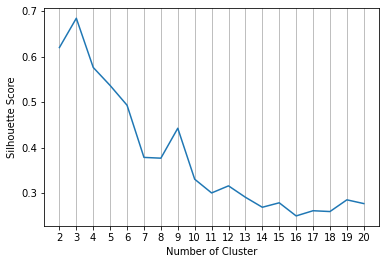

In [20]:
plt.plot(no_clus, ss)
plt.xticks(no_clus)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.grid(axis='x')
plt.show()